## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [199]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [202]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

9002


In [203]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['mask_weared_incorrect', 'without_mask', 'with_mask']


[3014, 2994, 2994]


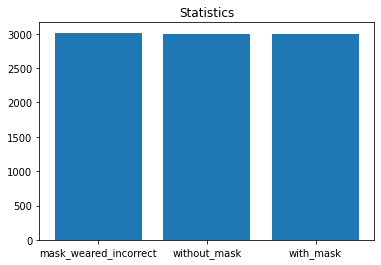

In [204]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

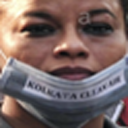

In [205]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow 

# Your code    
img=cv2.imread('/content/drive/MyDrive/Mask_Dataset/mask_weared_incorrect/1.png') 
cv2_imshow(img)

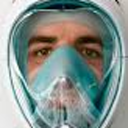

In [206]:
img=cv2.imread('/content/drive/MyDrive/Mask_Dataset/with_mask/1.png') 
cv2_imshow(img)

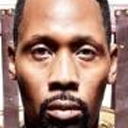

In [207]:
img=cv2.imread('/content/drive/MyDrive/Mask_Dataset/without_mask/1.png') 
cv2_imshow(img)

In [208]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model 

image1=cv2.imread('/content/drive/MyDrive/Mask_Dataset/mask_weared_incorrect/2450.png') 
image1.shape


(128, 128, 3)

In [209]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help  
img_array=[]   

for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir) 

for i in im_count: 
  image=this_path + '/' + i 
  img_array.append(cv2.imread(image).shape) 
  
print(img_array)


[(128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128, 3), (128, 128

In [210]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it

In [211]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [212]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten , Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential 
import keras

In [213]:
# Choose and define base model 
from keras.applications.vgg16 import VGG16  
from tensorflow.keras.applications.vgg16 import preprocess_input
vgg=VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

In [214]:
# Print base model summary and have a look at the layers 
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [215]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
vgg.trainable=False 

In [216]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [260]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model  
flatten = Flatten()(vgg.output)
dense = Dense(128, activation='relu')(flatten)
dense1 = Dense(64, activation='sigmoid')(dense) 
dense2 = Dense(3, activation='sigmoid')(dense1)
model = Model(inputs=vgg.input, outputs=dense2)



In [218]:
# Add the final output layer

In [261]:
# Print your model's summary 
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0  

In [262]:
# Compile you model (set the parameters like loss/optimizers/metrics)  
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])




### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [263]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Your code  
generate=ImageDataGenerator( validation_split=0.2)

In [238]:
# Anything else you wish to try 



### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [264]:
# Your code 
training = generate.flow_from_directory(
                                        directory='/content/drive/MyDrive/Mask_Dataset/',
                                        target_size=(128, 128), 
                                        color_mode='rgb', 
                                        batch_size=64,
                                        subset="training", 
                                        class_mode='categorical')

testing = generate.flow_from_directory(
                                       directory='/content/drive/MyDrive/Mask_Dataset/',
                                       target_size=(128,128),  
                                       color_mode='rgb',
                                       batch_size=64,
                                       subset="validation",
                                       class_mode='categorical')

Found 7204 images belonging to 5 classes.
Found 1798 images belonging to 5 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [240]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points) 
check=ModelCheckpoint(
    filepath='/content/drive/MyDrive/Mask_Dataset/',
    monitor="val_accuracy",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="max",
    
) 
history=model.fit(training,validation_data=testing,epochs=10, callbacks=[check])

Epoch 1/10
113/113 [==============================] - 24s 191ms/step - loss: 0.1941 - accuracy: 0.9822 - val_loss: 0.4644 - val_accuracy: 0.9716
Epoch 2/10
113/113 [==============================] - 21s 187ms/step - loss: 0.1029 - accuracy: 0.9895 - val_loss: 0.7268 - val_accuracy: 0.9683
Epoch 3/10
113/113 [==============================] - 22s 190ms/step - loss: 0.0584 - accuracy: 0.9949 - val_loss: 0.4121 - val_accuracy: 0.9839
Epoch 4/10
113/113 [==============================] - 22s 193ms/step - loss: 0.0151 - accuracy: 0.9988 - val_loss: 0.4106 - val_accuracy: 0.9850
Epoch 5/10
113/113 [==============================] - 21s 189ms/step - loss: 0.0877 - accuracy: 0.9938 - val_loss: 0.4658 - val_accuracy: 0.9778
Epoch 6/10
113/113 [==============================] - 22s 190ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.4412 - val_accuracy: 0.9833
Epoch 7/10
113/113 [==============================] - 21s 187ms/step - loss: 1.3849e-04 - accuracy: 1.0000 - val_loss: 0.4324 - va

### Evaluate the performance

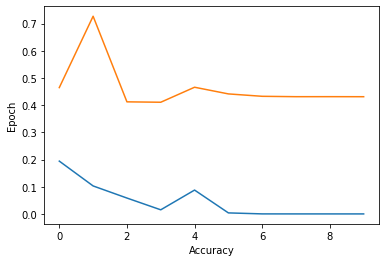

In [243]:
# Plot training & validation loss/accuracy values 
import matplotlib.pyplot as plt  

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.show()


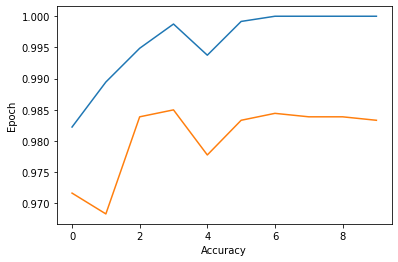

In [244]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.show()


In [256]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# print classification report 
pred=model.predict(testing)  
Y_pred = model.predict_generator(testing)
y_pred = np.argmax(Y_pred, axis=1) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [259]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points) 
print(classification_report(testing.classes, y_pred, target_names = ['mask_weared_incorrect', 'with_mask', 'without_mask']))

                       precision    recall  f1-score   support

mask_weared_incorrect       0.34      0.39      0.37       602
            with_mask       0.34      0.30      0.32       598
         without_mask       0.32      0.32      0.32       598

             accuracy                           0.34      1798
            macro avg       0.34      0.34      0.33      1798
         weighted avg       0.34      0.34      0.33      1798

